# Exploração dos dados SIVEP GRIPE 06/2020

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
%matplotlib inline

## Preprocessamento e filtragem dos dados

### Variáveis a serem exploradas: quantidade de casos em função do tempo
* Sexo
* Idade
* Etnia
* Escolaridade

Foram removidas abaixo algumas colunas. As colunas removidas contém informações que não pretendemos analisar nessa pesquisa que incluem: sintomas, viagem, vacinação e testes para outros vírus exceto o sars-cov-2

In [33]:
def preprocess_data(path):
    df = pd.read_csv(path, sep=';', encoding='latin-1')
    #filtrando as colunas relevantes para a nossa pesquisa
    colunas_filtro = pd.Series(df.columns.values)
    selecao = (colunas_filtro[0:30] + colunas_filtro[41:56] + colunas_filtro[68:77] + colunas_filtro[118:120] + colunas_filtro[121:125] + colunas_filtro[131:134]).index
    df_filtrado = df[colunas_filtro[selecao]]
    
    df_covid = df_filtrado[df_filtrado.CLASSI_FIN == 5]
    df_covid.rename(columns={'ï»¿DT_NOTIFIC':'DT_NOTIFIC'}, inplace=True)
    df_covid['DT_NOTIFIC'] = pd.to_datetime(df_covid['DT_NOTIFIC'], format='%d/%m/%Y')
    
    df_covid.to_csv('../dados/influd_processado.csv', index=False)

In [34]:
data_path = '../dados/influd_processado.csv'
if (not os.path.exists(data_path)):
    preprocess_data('../dados/influd.csv')
df_covid = pd.read_csv(data_path, sep=',', encoding='latin-1')
df_covid.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,HOSPITAL,DT_INTERNA,SG_UF_INTE,ID_RG_INTE,CO_RG_INTE,ID_MN_INTE,CO_MU_INTE,UTI,DT_ENTUTI,CLASSI_FIN,CLASSI_OUT,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,PCR_SARS2,PAC_COCBO,PAC_DSCBO
0,2020-03-04,10,02/03/2020,10,SP,GVE XXVII SAO JOSE DOS CAMPOS,1351.0,SAO JOSE DOS CAMPOS,354990,HOSPITAL SAO JOSE,3517918,M,10/02/1946,74,3,3074,6,1.0,NaN,9.0,BRASIL,1,SP,GVE VIII MOGI DAS CRUZES,1333.0,SANTA ISABEL,354680.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,NaN,1.0,SD MIELOSPLASIA,1.0,03/03/2020,SP,GVE XXVII SAO JOSE DOS CAMPOS,1351.0,SAO JOSE DOS CAMPOS,354990.0,1.0,03/03/2020,5.0,NaN,2.0,00000000,27/04/2020,04/03/2020,1.0,NaN,NaN
1,2020-03-03,10,17/02/2020,8,SP,GVE XI ARACATUBA,1336.0,AURIFLAMA,350420,UBS DE AURIFLAMA,2030497,F,10/01/1971,49,3,3049,5,4.0,NaN,9.0,BRASIL,1,SP,GVE XI ARACATUBA,1336.0,AURIFLAMA,350420.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,1.0,03/03/2020,SP,GVE XI ARACATUBA,1336.0,AURIFLAMA,350420.0,2.0,00000000,5.0,NaN,1.0,07/03/2020,25/05/2020,05/03/2020,1.0,NaN,NaN
2,2020-03-06,10,04/03/2020,10,DF,NaN,NaN,BRASILIA,530010,HRAN,10464,F,05/10/1967,52,3,3052,5,4.0,NaN,9.0,BRASIL,1,DF,NaN,NaN,BRASILIA,530010.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30.0,1.0,TMO,1.0,06/03/2020,DF,NaN,NaN,BRASILIA,530010.0,NaN,00000000,5.0,NaN,9.0,00000000,06/03/2020,06/03/2020,1.0,NaN,NaN
3,2020-03-04,10,01/03/2020,10,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,HOSPITAL INFANTIL PEQUENO PRINCIPE,15563,M,13/04/2018,1,3,3001,6,9.0,NaN,5.0,BRASIL,1,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,PRE TMO,1.0,06/03/2020,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690.0,2.0,00000000,5.0,NaN,1.0,16/04/2020,16/04/2020,06/03/2020,1.0,NaN,NaN
4,2020-03-05,10,01/03/2020,10,PE,001,1497.0,RECIFE,261160,REAL HOSPITAL PORTUGUES,1120,M,24/03/1948,71,3,3071,6,4.0,NaN,9.0,BRASIL,1,PE,001,1497.0,RECIFE,261160.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,HAS,1.0,05/03/2020,PE,001,1497.0,RECIFE,261160.0,NaN,00000000,5.0,NaN,NaN,00000000,21/03/2020,09/03/2020,1.0,NaN,NaN


* Informações sobre as colunas e preenchimento estão detalhadas no arquivo **dicionario-dados-SRAG-hospitalizado-Sivepgripe.pdf**

In [35]:
#configurando o pandas para mostrar todas as colunas do dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
df_covid.head(1)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,HOSPITAL,DT_INTERNA,SG_UF_INTE,ID_RG_INTE,CO_RG_INTE,ID_MN_INTE,CO_MU_INTE,UTI,DT_ENTUTI,CLASSI_FIN,CLASSI_OUT,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,PCR_SARS2,PAC_COCBO,PAC_DSCBO
0,2020-03-04,10,02/03/2020,10,SP,GVE XXVII SAO JOSE DOS CAMPOS,1351.0,SAO JOSE DOS CAMPOS,354990,HOSPITAL SAO JOSE,3517918,M,10/02/1946,74,3,3074,6,1.0,NaN,9.0,BRASIL,1,SP,GVE VIII MOGI DAS CRUZES,1333.0,SANTA ISABEL,354680.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,NaN,1.0,SD MIELOSPLASIA,1.0,03/03/2020,SP,GVE XXVII SAO JOSE DOS CAMPOS,1351.0,SAO JOSE DOS CAMPOS,354990.0,1.0,03/03/2020,5.0,NaN,2.0,00000000,27/04/2020,04/03/2020,1.0,NaN,NaN


In [36]:
#filtrando colunas relevantes para a pesquisa
#colunas_filtro = pd.Series(df.columns.values)
#selecao = (colunas_filtro[0:30] + colunas_filtro[41:56] + colunas_filtro[68:77] + colunas_filtro[118:120] + colunas_filtro[121:125] + colunas_filtro[131:134]).index
#df_filtrado = df[colunas_filtro[selecao]]

In [37]:
#colunas Excluidas
#set1 = set(colunas_filtro.index)
#set2 = set(selecao)
#excluidos = (list(set1 - set2))
#colunas_filtro[excluidos]

In [38]:
#colunas_filtro[selecao]

In [39]:
#df_covid = df_filtrado[df_filtrado.CLASSI_FIN == 5]
#df_covid.rename(columns={'ï»¿DT_NOTIFIC':'DT_NOTIFIC'}, inplace=True)
df_covid['DT_NOTIFIC'] = pd.to_datetime(df_covid['DT_NOTIFIC'], format='%Y/%m/%d')
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117432 entries, 0 to 117431
Data columns (total 63 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   DT_NOTIFIC  117432 non-null  datetime64[ns]
 1   SEM_NOT     117432 non-null  int64         
 2   DT_SIN_PRI  117432 non-null  object        
 3   SEM_PRI     117432 non-null  int64         
 4   SG_UF_NOT   117432 non-null  object        
 5   ID_REGIONA  96353 non-null   object        
 6   CO_REGIONA  96353 non-null   float64       
 7   ID_MUNICIP  117432 non-null  object        
 8   CO_MUN_NOT  117432 non-null  int64         
 9   ID_UNIDADE  117432 non-null  object        
 10  CO_UNI_NOT  117432 non-null  int64         
 11  CS_SEXO     117432 non-null  object        
 12  DT_NASC     117432 non-null  object        
 13  NU_IDADE_N  117432 non-null  int64         
 14  TP_IDADE    117432 non-null  int64         
 15  COD_IDADE   117432 non-null  int64         
 16  CS

## Análise da distribuição dos dados

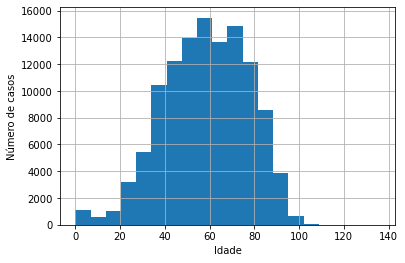

In [40]:
ax = df_covid.NU_IDADE_N.plot.hist(bins=20, grid=True)
ax.set_ylabel('Número de casos')
ax.set_xlabel('Idade')
plt.savefig('../graficos/histidade.svg')

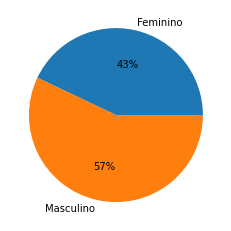

In [41]:
df_aux = df_sexo = df_covid.groupby([df_covid.CS_SEXO]).size()
df_sexo = df_sexo.drop('I').rename(index={'M':'Masculino','F':'Feminino'})
ax = df_sexo.plot.pie(autopct='%1.0f%%')
ax.set_ylabel('')
plt.savefig('../graficos/porcentagem_sexos_sivep.svg', dpi=300)
plt.savefig('../graficos/porcentagem_sexos_sivep.png', dpi=300)

In [42]:
df_aux = df_aux.transform(lambda x : x/sum(x))
df_aux.sort_values(ascending=False, inplace=True)
df_aux = df_aux.reset_index(name='Porcentagem')
df_aux['Porcentagem'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_aux['Porcentagem']], index = df_aux.index)
df_aux

,CS_SEXO,Porcentagem
0,M,57.04%
1,F,42.93%
2,I,0.03%


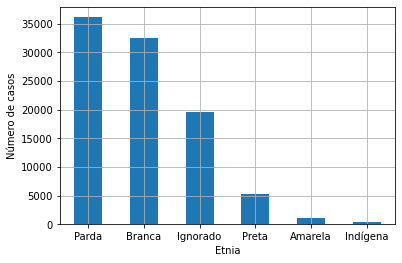

In [43]:
df_etnia = df_covid.groupby([df_covid.CS_RACA]).size().sort_values(ascending=False)
df_etnia.rename(index={1.0:'Branca', 2.0:'Preta', 3.0:'Amarela', 4.0:'Parda', 5.0:'Indígena', 9.0:'Ignorado'}, inplace=True)
ax = df_etnia.plot.bar(grid=True)
plt.xticks(rotation=0)
ax.set_ylabel('Número de casos')
ax.set_xlabel('Etnia')
plt.savefig('../graficos/porcentagem_etnias_sivep.svg', dpi=300)

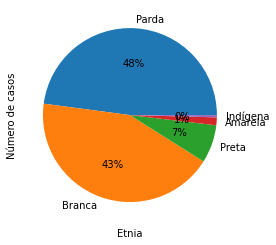

In [64]:
df_etnia = df_covid.groupby([df_covid.CS_RACA]).size().sort_values(ascending=False)
df_etnia.rename(index={1.0:'Branca', 2.0:'Preta', 3.0:'Amarela', 4.0:'Parda', 5.0:'Indígena', 9.0:'Ignorado'}, inplace=True)
df_aux = df_etnia.copy()
df_etnia.drop('Ignorado', inplace=True)
ax = df_etnia.plot.pie(autopct='%1.0f%%')
plt.xticks(rotation=0)
ax.set_ylabel('Número de casos')
ax.set_xlabel('Etnia')
plt.savefig('../graficos/porcentagem_etnias_sivep.svg', dpi=300)

In [65]:
df_aux = df_aux.transform(lambda x : x/sum(x))
df_aux.sort_values(ascending=False, inplace=True)
df_aux = df_aux.reset_index(name='Porcentagem')
df_aux['Porcentagem'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_aux['Porcentagem']], index = df_aux.index)
df_aux

,CS_RACA,Porcentagem
0,Parda,38.04%
1,Branca,34.27%
2,Ignorado,20.58%
3,Preta,5.62%
4,Amarela,1.16%
5,Indígena,0.34%


In [46]:
df_etnia.head()

CS_RACA
Parda       36098
Branca      32514
Preta        5329
Amarela      1097
Indígena      318
dtype: int64

In [47]:
df_aux = df_etnia.transform(lambda x : x/sum(x))
df_aux.sort_values(ascending=False, inplace=True)
df_aux = df_aux.reset_index(name='Porcentagem')
df_aux['Porcentagem'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_aux['Porcentagem']], index = df_aux.index)
df_aux = df_aux.set_index('CS_RACA')
df_aux

,Porcentagem
CS_RACA,
Parda,47.90%
Branca,43.15%
Preta,7.07%
Amarela,1.46%
Indígena,0.42%


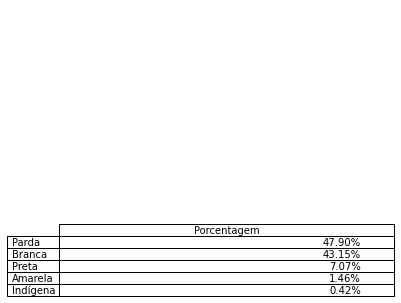

In [48]:
from pandas.plotting import table # EDIT: see deprecation warnings below

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df_aux)  # where df is your data frame

plt.savefig('tabela_porcentagem_etnias.png')

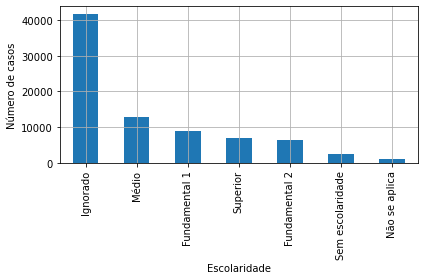

In [49]:
df_aux = df_esc = df_covid.groupby([df_covid.CS_ESCOL_N]).size().sort_values(ascending=False)
df_esc.rename(index={0.0:'Sem escolaridade', 1.0:'Fundamental 1', 2.0:'Fundamental 2', 3.0:'Médio', 4.0:'Superior', 5.0:'Não se aplica', 9.0:'Ignorado'}, inplace=True)
ax = df_esc.plot.bar(grid=True)
ax.set_ylabel('Número de casos')
ax.set_xlabel('Escolaridade')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../graficos/porcentagem_escolaridade_sivep.svg', dpi=300)

In [50]:
df_aux = df_aux.transform(lambda x : x/sum(x))
df_aux.sort_values(ascending=False, inplace=True)
df_aux = df_aux.reset_index(name='Porcentagem')
df_aux['Porcentagem'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_aux['Porcentagem']], index = df_aux.index)
df_aux

,CS_ESCOL_N,Porcentagem
0,Ignorado,51.86%
1,Médio,16.04%
2,Fundamental 1,11.03%
3,Superior,8.77%
4,Fundamental 2,7.98%
5,Sem escolaridade,3.15%
6,Não se aplica,1.18%


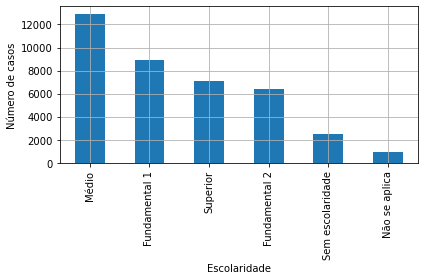

In [51]:
#se desconsiderar os ignorados
df_esc2 = df_esc.drop('Ignorado')
ax = df_esc2.plot.bar(grid=True)
ax.set_ylabel('Número de casos')
ax.set_xlabel('Escolaridade')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../graficos/porcentagem_escolaridade_sivep2.svg', dpi=300)

## Análise de casos de covid por sexo

In [52]:
df_sexo = df_covid.groupby([df_covid.DT_NOTIFIC, df_covid.CS_SEXO]).size().reset_index()
df_sexo

,DT_NOTIFIC,CS_SEXO,0
0,2020-02-28,F,1
1,2020-02-29,F,1
2,2020-03-01,M,1
3,2020-03-02,M,1
4,2020-03-03,F,1
...,...,...,...
229,2020-06-14,M,246
230,2020-06-15,F,464
231,2020-06-15,M,572
232,2020-06-16,F,273


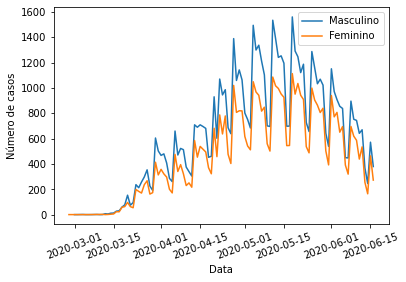

In [53]:
ax = plt.axes()
plt.plot(df_sexo[df_sexo['CS_SEXO'] == 'M']['DT_NOTIFIC'],df_sexo[df_sexo['CS_SEXO'] == 'M'][0], label='Masculino')
plt.plot(df_sexo[df_sexo['CS_SEXO'] == 'F']['DT_NOTIFIC'],df_sexo[df_sexo['CS_SEXO'] == 'F'][0], label='Feminino')
#plt.yscale('log')
plt.legend()
plt.xticks(rotation=20)
ax.set_ylabel('Número de casos')
ax.set_xlabel('Data')
plt.savefig('../graficos/sexocont.svg', dpi=300)
plt.savefig('../graficos/sexocont.png', dpi=300)
plt.show()

In [54]:
media_m = df_sexo[df_sexo['CS_SEXO'] == 'M'].mean()[0]
media_f = df_sexo[df_sexo['CS_SEXO'] == 'F'].mean()[0]
print(media_f, media_m)

480.14285714285717 631.9433962264151


## Análise de casos de covid por etnia
É importante destacar que essa análise ainda não está normalizada. Por exemplo, provavelmente aparecem menos casos de pessoas indígenas e amarelas pois é uma parcela pequena da população braseileira comparada as etnias branca, preta e parda.

In [55]:
df_etnia = df_covid.groupby([df_covid.DT_NOTIFIC, df_covid.CS_RACA]).size().reset_index()
df_etnia = df_etnia[df_etnia['CS_RACA'] != 9.0]

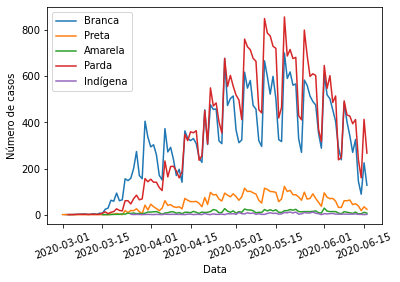

In [56]:
etnias = {1:'Branca', 2:'Preta', 3:'Amarela', 4:'Parda', 5:'Indígena'}
dicio = etnias
data = df_etnia
varx = 'DT_NOTIFIC'
vary = 'CS_RACA'
ax = plt.axes()
for key in dicio:
    plt.plot(data[data[vary] == key][varx], data[data[vary] == key][0], label=dicio[key])
    
ax.set_ylabel('Número de casos')
ax.set_xlabel('Data')
plt.xticks(rotation=20)
plt.legend()
plt.savefig('../graficos/etniacont.svg', dpi=300)
plt.savefig('../graficos/etniacont.png', dpi=300)
plt.show()

Com os dados normalizados por uma taxa de 100 mil pessoas de cada etnia

In [57]:
df_qtd = pd.read_csv('../dados/etniasbrasil.csv', sep=',', encoding='latin-1')
df_qtd = df_qtd.rename(columns={'IndÃ­gena':'Indígena'})
df_qtd = df_qtd.squeeze()
df_qtd.head()


Branca      91051646
Preta       14517961
Amarela      2084288
Parda       82277333
Indígena      817963
Name: 0, dtype: int64

In [58]:
etnias = {1:'Branca', 2:'Preta', 3:'Amarela', 4:'Parda', 5:'Indígena'}
def normalizar(row):
    return ((row[0] * 100000) / df_qtd[etnias[row['CS_RACA']]])

df_etnia[0] = df_etnia.apply(normalizar, axis=1)
df_etnia.head()

,DT_NOTIFIC,CS_RACA,0
1,2020-03-01,2.0,0.006888
2,2020-03-02,1.0,0.001098
3,2020-03-03,4.0,0.001215
4,2020-03-04,1.0,0.001098
6,2020-03-05,4.0,0.001215


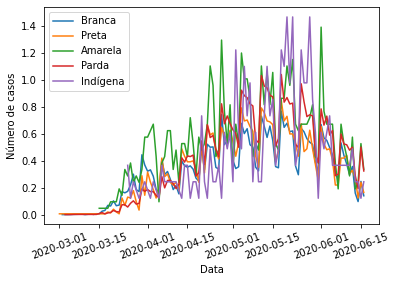

In [59]:
etnias = {1:'Branca', 2:'Preta', 3:'Amarela', 4:'Parda', 5:'Indígena'}
dicio = etnias
data = df_etnia
varx = 'DT_NOTIFIC'
vary = 'CS_RACA'
ax = plt.axes()
for key in dicio:
    plt.plot(data[data[vary] == key][varx], data[data[vary] == key][0], label=dicio[key])
    
ax.set_ylabel('Número de casos')
ax.set_xlabel('Data')
plt.xticks(rotation=20)
plt.legend()
#plt.savefig('../graficos/etniacont.svg', dpi=300)
plt.savefig('../graficos/etnia_cont_normalizado.png', dpi=300)
plt.show()

## Análise de casos por escolaridade
Para melhor visualização, juntou-se pessoas com fundamental 1 e 2

In [60]:
df_esc = df_covid[['CS_ESCOL_N', 'DT_NOTIFIC']]
df_esc['CS_ESCOL_N'] = df_esc.CS_ESCOL_N.replace({2:1}, inplace=False)
df_esc = df_esc.groupby([df_esc.CS_ESCOL_N, df_esc.DT_NOTIFIC]).size().reset_index()

<ipython-input-60-55df95ba710f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_esc['CS_ESCOL_N'] = df_esc.CS_ESCOL_N.replace({2:1}, inplace=False)


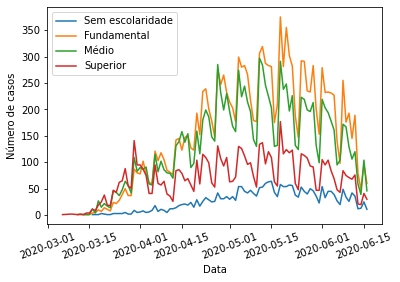

In [61]:
esc = {0:'Sem escolaridade', 1:'Fundamental', 3:'Médio', 4:'Superior'}
dicio = esc
data = df_esc
varx = 'DT_NOTIFIC'
vary = 'CS_ESCOL_N'
ax = plt.axes()
for key in esc:
    plt.plot(data[data[vary] == key][varx], data[data[vary] == key][0], label=dicio[key])

ax.set_ylabel('Número de casos')
ax.set_xlabel('Data')
plt.xticks(rotation=20)
plt.legend()
plt.savefig('../graficos/esccont.svg', dpi=300)
plt.savefig('../graficos/esccont.png', dpi=300)
plt.show()

## Análise das distribuições de idades